In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
carros = pd.read_csv('C:/Users/User/Desktop/UNAD-SEM 6/Analisis de datos/tare 3/dataset/autos/cardetailsv4.csv')

In [3]:
carros.head(10)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
5,Maruti Suzuki,Ciaz ZXi,675000,2017,73315,Petrol,Manual,Pune,Grey,First,Individual,1373 cc,91 bhp @ 6000 rpm,130 Nm @ 4000 rpm,FWD,4490.0,1730.0,1485.0,5.0,43.0
6,Mercedes-Benz,CLA 200 Petrol Sport,1898999,2015,47000,Petrol,Automatic,Mumbai,White,Second,Individual,1991 cc,181 bhp @ 5500 rpm,300 Nm @ 1200 rpm,FWD,4630.0,1777.0,1432.0,5.0,NaN
7,BMW,X1 xDrive20d M Sport,2650000,2017,75000,Diesel,Automatic,Coimbatore,White,Second,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,AWD,4439.0,1821.0,1612.0,5.0,51.0
8,Skoda,Octavia 1.8 TSI Style Plus AT [2017],1390000,2017,56000,Petrol,Automatic,Mumbai,White,First,Individual,1798 cc,177 bhp @ 5100 rpm,250 Nm @ 1250 rpm,FWD,4670.0,1814.0,1476.0,5.0,50.0
9,Nissan,Terrano XL (D),575000,2015,85000,Diesel,Manual,Mumbai,White,First,Individual,1461 cc,84 bhp @ 3750 rpm,200 Nm @ 1900 rpm,FWD,4331.0,1822.0,1671.0,5.0,50.0


In [4]:
carros.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2.059000e+03,2059.000000,2.059000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1.702992e+06,2016.425449,5.422471e+04,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,2.419881e+06,3.363564,5.736172e+04,442.458507,135.265825,136.073956,0.822170,15.110198
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,4.849990e+05,2014.000000,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1.925000e+06,2019.000000,7.200000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


Text(0.5, 1.0, 'Identificación de datos faltantes y atipicos')

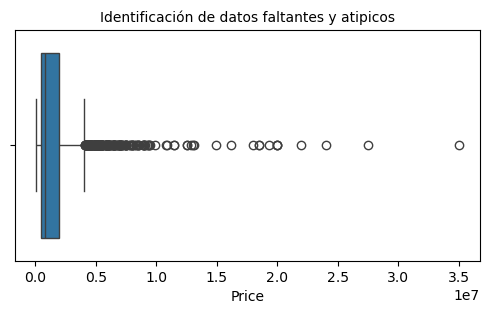

In [5]:
plt.figure(figsize=(6,3))
sns.boxplot(x=carros['Price'])
plt.title('Identificación de datos faltantes y atipicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de datos faltantes y atipicos')

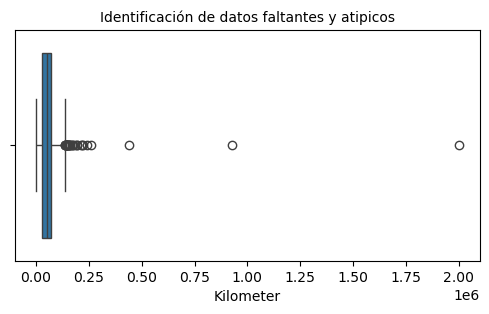

In [6]:
plt.figure(figsize=(6,3))
sns.boxplot(x=carros['Kilometer'])
plt.title('Identificación de datos faltantes y atipicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de datos faltantes y atipicos')

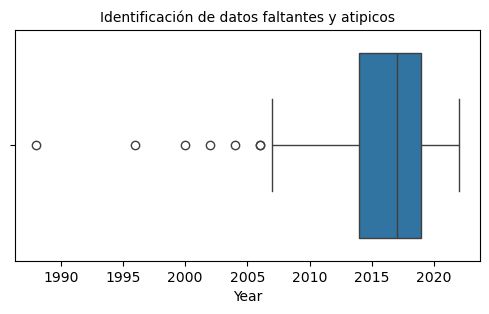

In [7]:
plt.figure(figsize=(6,3))
sns.boxplot(x=carros['Year'])
plt.title('Identificación de datos faltantes y atipicos', fontsize=10)

In [8]:
print("Cantidad de registros con cero en precio de venta: ",carros['Price'].isin([0]).sum())
print("Cantidad de registros con cero en km: ",carros['Kilometer'].isin([0]).sum())

Cantidad de registros con cero en precio de venta:  0
Cantidad de registros con cero en km:  1


In [9]:
nivel_min=20000
nivel_max=300000
total_atípicos=((carros['Kilometer']<nivel_min)|(carros['Kilometer']>nivel_max)).sum()
print("El total de datos atípicos es {}".format(total_atípicos))

El total de datos atípicos es 328


In [10]:
carros=carros[(carros['Kilometer']<nivel_max)&(carros['Kilometer']>nivel_min)]

In [11]:
total_atípicos=((carros['Kilometer']<nivel_min)|(carros['Kilometer']>nivel_max)).sum()
print("El total de datos atípicos es {}".format(total_atípicos))

El total de datos atípicos es 0


In [23]:
carros = carros.dropna()

In [24]:
print("Cantidad de registros con cero en precio de venta: ",carros['Price'].isin([0]).sum())
print("Cantidad de registros con cero en km: ",carros['Kilometer'].isin([0]).sum())

Cantidad de registros con cero en precio de venta:  0
Cantidad de registros con cero en km:  0


In [27]:
Q1 = carros['Price'].quantile(0.25)
Q3 = carros['Price'].quantile(0.75)
IQR = Q3 - Q1
carros = carros[(carros['Price'] > (Q1 - 1.5 * IQR)) & (carros['Price'] < (Q3 + 1.5 * IQR))]

Q1_km = carros['Kilometer'].quantile(0.25)
Q3_km = carros['Kilometer'].quantile(0.75)
IQR_km = Q3_km - Q1_km
carros = carros[(carros['Kilometer'] > (Q1_km - 1.5 * IQR_km)) & (carros['Kilometer'] < (Q3_km + 1.5 * IQR_km))]

In [29]:
carros = carros[carros['Price'] > 0]

In [31]:
carros.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1366 entries, 0 to 2056
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1366 non-null   object 
 1   Model               1366 non-null   object 
 2   Price               1366 non-null   int64  
 3   Year                1366 non-null   int64  
 4   Kilometer           1366 non-null   int64  
 5   Fuel Type           1366 non-null   object 
 6   Transmission        1366 non-null   object 
 7   Location            1366 non-null   object 
 8   Color               1366 non-null   object 
 9   Owner               1366 non-null   object 
 10  Seller Type         1366 non-null   object 
 11  Engine              1366 non-null   object 
 12  Max Power           1366 non-null   object 
 13  Max Torque          1366 non-null   object 
 14  Drivetrain          1366 non-null   object 
 15  Length              1366 non-null   float64
 16  Width      

In [33]:
import numpy as np

In [35]:
carros.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [37]:
carros_info = carros.select_dtypes(np.number)

In [39]:
carros_info.head(10)

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,505000,2017,87150,3990.0,1680.0,1505.0,5.0,35.0
1,450000,2014,75000,3995.0,1695.0,1555.0,5.0,42.0
2,220000,2011,67000,3585.0,1595.0,1550.0,5.0,35.0
3,799000,2019,37500,3995.0,1745.0,1510.0,5.0,37.0
4,1950000,2018,69000,4735.0,1830.0,1795.0,7.0,55.0
5,675000,2017,73315,4490.0,1730.0,1485.0,5.0,43.0
7,2650000,2017,75000,4439.0,1821.0,1612.0,5.0,51.0
8,1390000,2017,56000,4670.0,1814.0,1476.0,5.0,50.0
9,575000,2015,85000,4331.0,1822.0,1671.0,5.0,50.0
10,591000,2017,20281,3985.0,1734.0,1505.0,5.0,45.0


In [41]:
X = carros_info.drop('Price',axis=1) 
Y = carros_info['Price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 0)

In [43]:
print (X_train)

      Year  Kilometer  Length   Width  Height  Seating Capacity  \
1406  2014      55000  3765.0  1660.0  1520.0               5.0   
1167  2013      41000  3585.0  1595.0  1550.0               5.0   
1697  2015      64000  3545.0  1490.0  1475.0               5.0   
1612  2015      63587  3990.0  1680.0  1505.0               5.0   
1174  2018      20690  4413.0  1699.0  1466.0               5.0   
...    ...        ...     ...     ...     ...               ...   
1175  2019      40000  4375.0  1700.0  1475.0               5.0   
1279  2010      72000  3795.0  1680.0  1427.0               5.0   
1826  2013      51500  3985.0  1850.0  1880.0               7.0   
853   2013     106223  4755.0  1900.0  1785.0               7.0   
1041  2014      53000  4838.0  1817.0  1482.0               5.0   

      Fuel Tank Capacity  
1406                43.0  
1167                35.0  
1697                35.0  
1612                35.0  
1174                55.0  
...                  ...  
1175  

In [45]:
print (X_test)

      Year  Kilometer  Length   Width  Height  Seating Capacity  \
1571  2020      25000  3995.0  1695.0  1501.0               5.0   
979   2016      70000  4861.0  1864.0  1483.0               5.0   
1641  2017      93000  4585.0  1890.0  1785.0               7.0   
37    2019      71000  4735.0  1830.0  1795.0               8.0   
195   2014      60514  4781.0  1911.0  1774.0               5.0   
...    ...        ...     ...     ...     ...               ...   
999   2018     110000  4735.0  1830.0  1795.0               7.0   
368   2014      48409  4440.0  1695.0  1495.0               5.0   
672   2021      38000  4296.0  1695.0  1685.0               7.0   
1216  2017      28000  4670.0  1814.0  1476.0               5.0   
1640  2019      60969  3785.0  1635.0  1485.0               5.0   

      Fuel Tank Capacity  
1571                35.0  
979                 66.0  
1641                70.0  
37                  55.0  
195                 95.0  
...                  ...  
999   

In [47]:
modelo_regresion = LinearRegression()
modelo_regresion.fit (X_train , Y_train)   

Prediccion = modelo_regresion.predict(X_test)

In [49]:
X_test.head(10)

,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
1571,2020,25000,3995.0,1695.0,1501.0,5.0,35.0
979,2016,70000,4861.0,1864.0,1483.0,5.0,66.0
1641,2017,93000,4585.0,1890.0,1785.0,7.0,70.0
37,2019,71000,4735.0,1830.0,1795.0,8.0,55.0
195,2014,60514,4781.0,1911.0,1774.0,5.0,95.0
396,2017,31000,4490.0,1730.0,1485.0,5.0,43.0
475,2018,50000,4454.0,2044.0,1545.0,5.0,63.0
1802,2011,72100,5226.0,2120.0,1479.0,5.0,90.0
441,2019,34000,4440.0,1695.0,1495.0,5.0,40.0
1462,2010,62000,3600.0,1475.0,1595.0,5.0,35.0


In [51]:
mae = mean_absolute_error(Y_test, Prediccion)
mse = mean_squared_error(Y_test, Prediccion)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Prediccion)

In [53]:
print(f"MAE (Error Absoluto Medio): {mae:.2f}")
print(f"MSE (Error Cuadrático Medio): {mse:.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE (Error Absoluto Medio): 318567.14
MSE (Error Cuadrático Medio): 164257526450.91
RMSE (Raíz del Error Cuadrático Medio): 405286.97
R² Score: 0.66


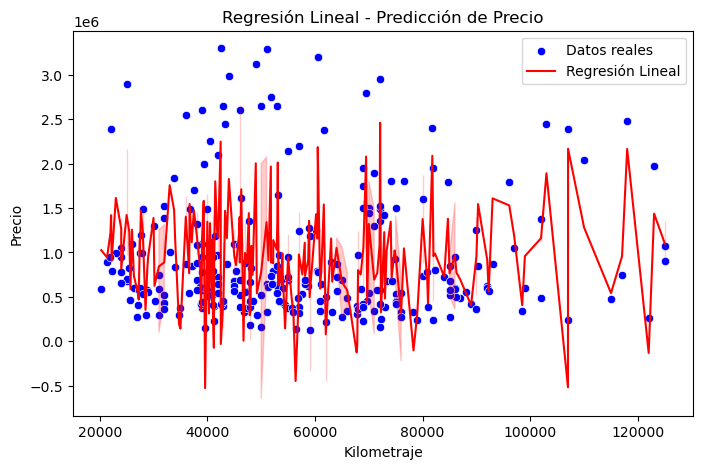

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test['Kilometer'], y=Y_test, label="Datos reales", color='blue')


sns.lineplot(x=X_test['Kilometer'], y=Prediccion, color="red", label="Regresión Lineal")

plt.xlabel("Kilometraje")
plt.ylabel("Precio")
plt.title("Regresión Lineal - Predicción de Precio")
plt.legend()
plt.show()
